# **Разведочный анализ данных (EDA)**

### Был выбран датасет №10 Т-Банк: звонки операторов клиентам

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('sale_tasks_dataset.csv', low_memory=False)

In [4]:
# Первичный осмотр данных
print("Размер датасета:", df.shape)
print("\nИнформация о данных:")
df.info()
print("\nПервые 5 строк:")
display(df.head())
print("\nОсновные статистики:")
display(df.describe(include='all'))

Размер датасета: (18691, 28)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 18691 non-null  int64  
 1   age                         18509 non-null  object 
 2   gender_cd                   18433 non-null  object 
 3   region_size                 11402 non-null  object 
 4   foreign_flg                 11402 non-null  float64
 5   entrepreneur_flg            11402 non-null  float64
 6   auto_flg                    11402 non-null  float64
 7   traveler_flg                11402 non-null  float64
 8   partnership_flg             11402 non-null  float64
 9   child_amt                   11402 non-null  float64
 10  realty_type                 11402 non-null  object 
 11  segment_cd                  11402 non-null  object 
 12  bundle_nm                   4703 non-

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,"Дозвон, Отказ",Перезвонит самостоятельно позднее,142052.0,30,W,NaN,1,NaN,NaN
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,738.0,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,"Дозвон, Отказ",Переведен в банк,14462.0,51,W,NaN,7,NaN,NaN



Основные статистики:


,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
count,1.869100e+04,18509,18433,11402,11402.000000,11402.000000,11402.000000,11402.000000,11402.000000,11402.000000,...,18543.000000,18691,18691,18691.000000,18691.000000,16511,86.000000,18691.000000,6204,3866
unique,NaN,75,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,278,NaN,NaN,2,NaN,NaN,2,3
top,NaN,36.0,M,town,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"Дозвон, Отказ",Кредитная карта не нужна,NaN,NaN,W,NaN,NaN,RUS,UNM
freq,NaN,680,9881,6054,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16274,3870,NaN,NaN,13483,NaN,NaN,6203,3692
mean,3.166681e+08,NaN,NaN,NaN,0.009647,0.138309,0.501666,0.019558,0.790475,0.377741,...,86.350105,NaN,NaN,163220.261944,35.617944,NaN,1.151163,5.401263,NaN,NaN
std,1.488096e+08,NaN,NaN,NaN,0.097751,0.345239,0.500019,0.138482,0.406987,0.664226,...,127.011570,NaN,NaN,78054.113022,13.480531,NaN,1.367845,3.483958,NaN,NaN
min,1.423600e+04,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,871.000000,18.000000,NaN,0.000000,0.000000,NaN,NaN
25%,1.828957e+08,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,24.000000,NaN,NaN,109957.000000,23.000000,NaN,0.000000,2.000000,NaN,NaN
50%,3.436865e+08,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,46.000000,NaN,NaN,180298.000000,33.000000,NaN,0.000000,6.000000,NaN,NaN
75%,4.334274e+08,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,99.000000,NaN,NaN,224828.000000,46.000000,NaN,3.000000,8.000000,NaN,NaN


In [5]:
# Проверка пропущенных значений
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
})
print("Пропущенные значения:")
display(missing_df[missing_df['Количество пропусков'] > 0].head(15))

Пропущенные значения:


,Количество пропусков,Процент пропусков
emp_children_cnt,18605,99.539886
confirmed_income,17284,92.472313
emp_marital_status_cd,14825,79.316248
predicted_income,14604,78.133861
bundle_nm,13988,74.838157
emp_citizenship_country_cd,12487,66.807554
realty_type,7289,38.997378
entrepreneur_flg,7289,38.997378
region_size,7289,38.997378
segment_cd,7289,38.997378


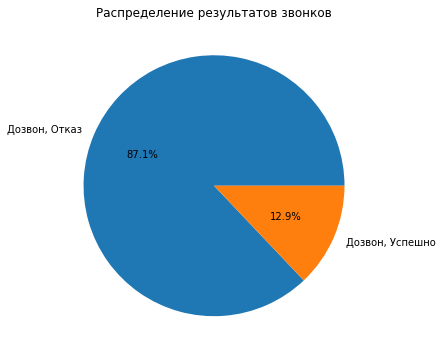

In [6]:
# Анализ целевой переменной - результата звонка
plt.figure(figsize=(10, 6))
status_counts = df['wo_hit_status_result_desc'].value_counts()
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Распределение результатов звонков')
plt.show()

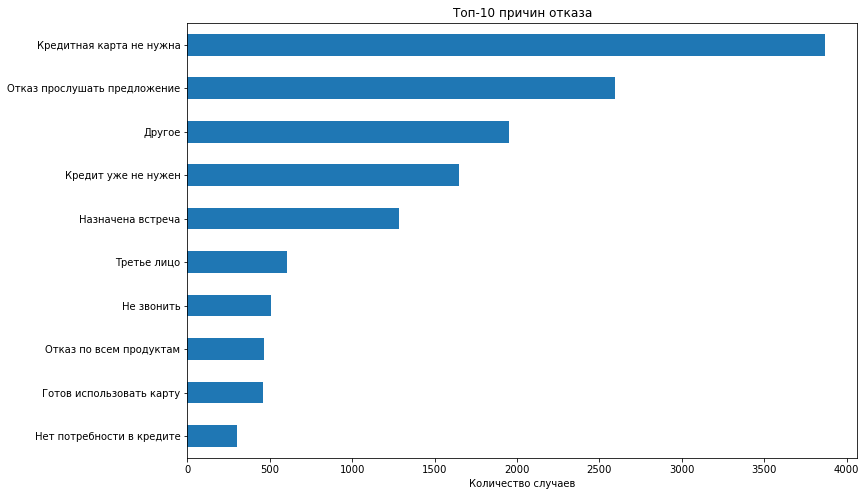

In [7]:
# Анализ причин отказа
plt.figure(figsize=(12, 8))
reason_counts = df['wo_hit_status_reason_desc'].value_counts().head(10)
reason_counts.plot(kind='barh')
plt.title('Топ-10 причин отказа')
plt.xlabel('Количество случаев')
plt.gca().invert_yaxis()
plt.show()

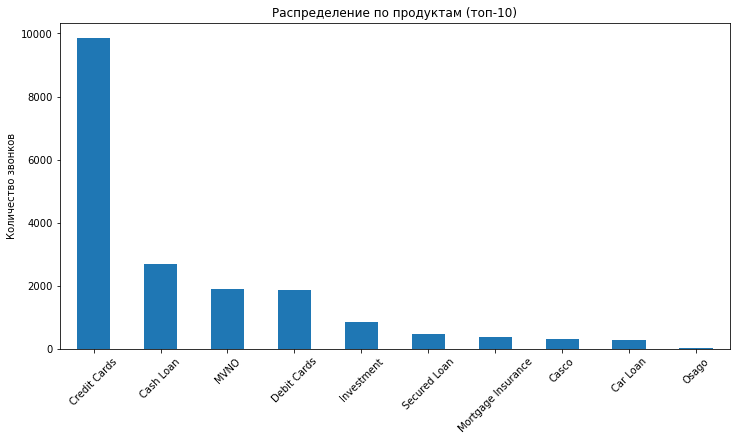

In [8]:
# Анализ продуктов
plt.figure(figsize=(12, 6))
product_counts = df['product_cd'].value_counts().head(10)
product_counts.plot(kind='bar')
plt.title('Распределение по продуктам (топ-10)')
plt.ylabel('Количество звонков')
plt.xticks(rotation=45)
plt.show()

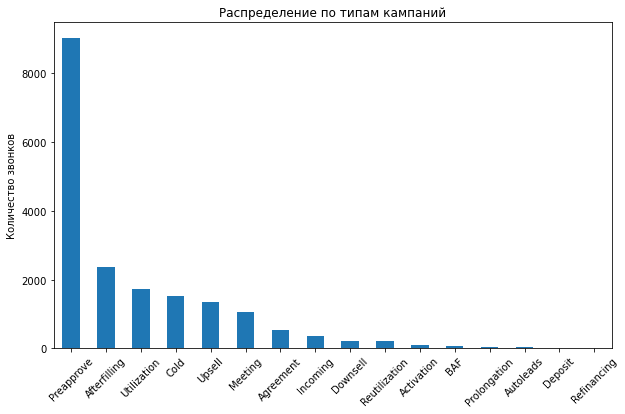

In [9]:
# Анализ по типам кампаний
plt.figure(figsize=(10, 6))
functional_counts = df['functional_cd'].value_counts()
functional_counts.plot(kind='bar')
plt.title('Распределение по типам кампаний')
plt.ylabel('Количество звонков')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Частота')

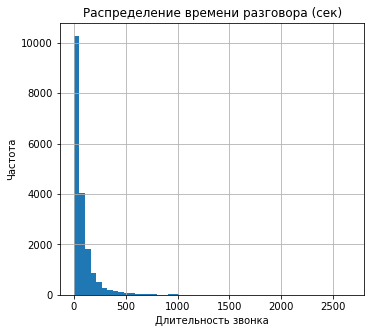

In [10]:
# Анализ продолжительности звонков
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['state_talk_time_sec'].hist(bins=50)
plt.title('Распределение времени разговора (сек)')
plt.xlabel('Длительность звонка')
plt.ylabel('Частота')

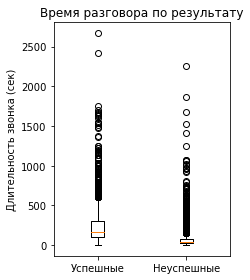

In [11]:
plt.subplot(1, 2, 2)
success_calls = df[df['wo_hit_status_result_desc'].str.contains('Успешно', na=False)]
failed_calls = df[df['wo_hit_status_result_desc'].str.contains('Отказ', na=False)]
plt.boxplot([success_calls['state_talk_time_sec'].dropna(), 
             failed_calls['state_talk_time_sec'].dropna()], 
            labels=['Успешные', 'Неуспешные'])
plt.title('Время разговора по результату')
plt.ylabel('Длительность звонка (сек)')
plt.tight_layout()
plt.show()

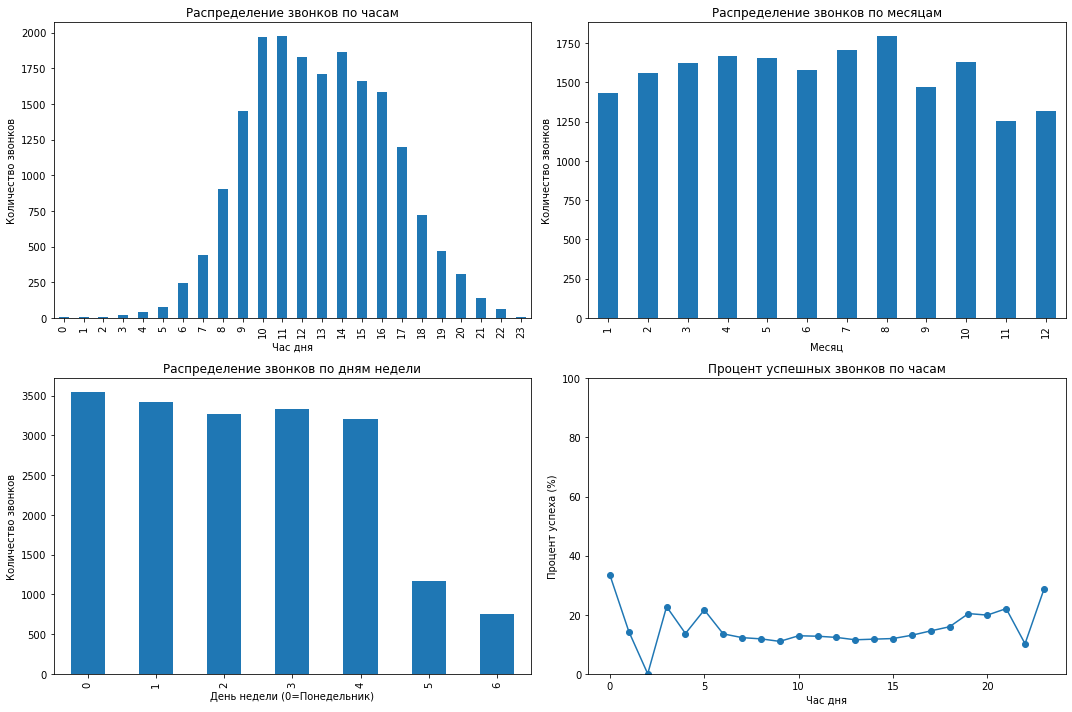

In [ ]:
# Анализ временных закономерностей
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'])
df['call_hour'] = df['finish_dttm'].dt.hour
df['call_month'] = df['finish_dttm'].dt.month
df['call_weekday'] = df['finish_dttm'].dt.weekday

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
hourly_calls = df['call_hour'].value_counts().sort_index()
hourly_calls.plot(kind='bar')
plt.title('Распределение звонков по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество звонков')

plt.subplot(2, 2, 2)
monthly_calls = df['call_month'].value_counts().sort_index()
monthly_calls.plot(kind='bar')
plt.title('Распределение звонков по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество звонков')

plt.subplot(2, 2, 3)
weekday_calls = df['call_weekday'].value_counts().sort_index()
weekday_calls.plot(kind='bar')
plt.title('Распределение звонков по дням недели')
plt.xlabel('День недели (0=Понедельник)')
plt.ylabel('Количество звонков')

plt.subplot(2, 2, 4)
success_rate_by_hour = df.groupby('call_hour')['wo_hit_status_result_desc'].apply(
    lambda x: (x.str.contains('Успешно').sum() / len(x) * 100))
success_rate_by_hour.plot(kind='line', marker='o')
plt.title('Процент успешных звонков по часам')
plt.xlabel('Час дня')
plt.ylabel('Процент успеха (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [13]:
# Анализ эффективности операторов
operator_stats = df.groupby('employee_id').agg({
    'wo_hit_status_result_desc': lambda x: (x.str.contains('Успешно').sum() / len(x) * 100),
    'state_talk_time_sec': 'mean',
    'customer_id': 'count'
}).rename(columns={
    'wo_hit_status_result_desc': 'success_rate',
    'state_talk_time_sec': 'avg_call_duration',
    'customer_id': 'call_count'
})

print("Топ-10 операторов по эффективности:")
display(operator_stats.sort_values('success_rate', ascending=False).head(10))

print("\nТоп-10 операторов по количеству звонков:")
display(operator_stats.sort_values('call_count', ascending=False).head(10))

Топ-10 операторов по эффективности:


,success_rate,avg_call_duration,call_count
employee_id,,,
156316.0,100.0,194.0,3
227831.0,100.0,101.0,1
18817.0,100.0,96.5,2
171005.0,100.0,146.0,1
173151.0,100.0,118.0,1
173661.0,100.0,132.0,2
272602.0,100.0,109.0,1
23814.0,100.0,213.0,1
128970.0,100.0,201.0,2



Топ-10 операторов по количеству звонков:


,success_rate,avg_call_duration,call_count
employee_id,,,
109997.0,5.219780,80.780220,364
235421.0,1.673640,48.899582,239
40200.0,32.489451,114.717300,237
203268.0,8.260870,88.829694,230
97044.0,44.347826,132.669565,230
152852.0,10.714286,103.683673,196
109957.0,3.208556,66.877005,187
191371.0,3.260870,58.614130,184
171390.0,11.666667,96.322222,180
